In [1]:
import os

# walk through the list of directories and number of files
total_image = 0
for dirpath, dirnames, filenames in os.walk("D:/datasets"):
    total_image = total_image + int(len(filenames))
print(total_image)

307


In [2]:
num_of_bird_groups = len(os.listdir("D:/datasets/train_data/train_data"))
num_of_bird_groups

16

In [3]:
import pathlib 
import numpy as np

data_dir = pathlib.Path("D:/datasets/train_data/train_data")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # creating a list of class names from subdirectory 
print(class_names)

['blasti' 'bonegl' 'brhkyt' 'cbrtsh' 'cmnmyn' 'gretit' 'hilpig' 'himbul'
 'himgri' 'hsparo' 'indvul' 'jglowl' 'lbicrw' 'mgprob' 'rebimg' 'wcrsrt']


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setting up the image directory
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read image and plotting it
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  
  return img

Image shape: (2160, 2880, 3)


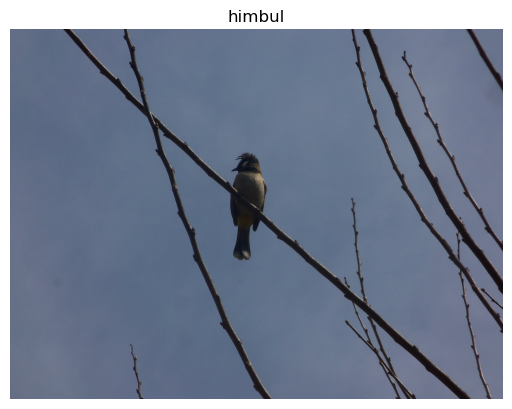

In [5]:
img = view_random_image(target_dir = "D:/datasets/train_data/train_data/",
                        target_class = "himbul")

In [6]:
import tensorflow as tf
img.shape #(width, height, colour channels)

(2160, 2880, 3)

Image shape: (4000, 6016, 3)
Image shape: (2160, 2880, 3)
Image shape: (4000, 6016, 3)


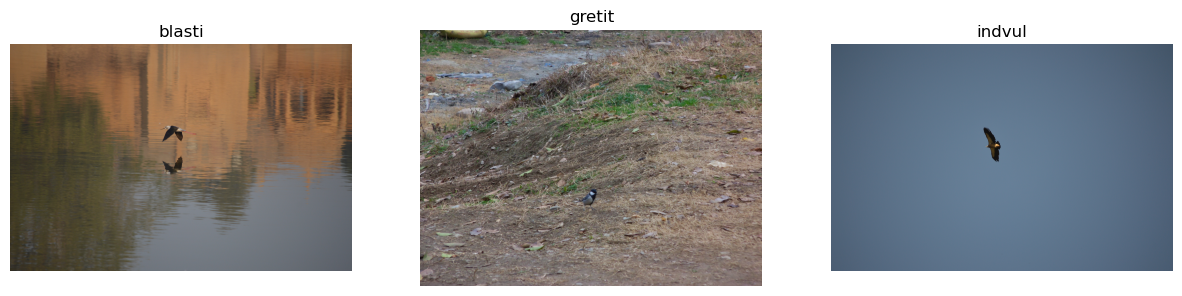

In [7]:
plt.figure(figsize = (15,7))
plt.subplot(1,3,1)
steak_image = view_random_image("D:/datasets/train_data/train_data/", "blasti")
plt.subplot(1,3,2)
pizza_image = view_random_image("D:/datasets/train_data/train_data/", "gretit")
plt.subplot(1,3,3)
pizza_image = view_random_image("D:/datasets/train_data/train_data/", "indvul")

In [8]:
import tensorflow as tf
import PIL
from keras.preprocessing.image import ImageDataGenerator
from pathlib import Path
from PIL import UnidentifiedImageError
from PIL import ImageFile  
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [9]:
datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split = 0.2,
                                   horizontal_flip = True)
training_set = datagen.flow_from_directory("D:/datasets/train_data/train_data",
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 subset='training',
                                                 class_mode = 'categorical')

Found 124 images belonging to 16 classes.


In [10]:
test_set = datagen.flow_from_directory("D:/datasets/test_data/test_data",
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 subset='validation',
                                                 class_mode = 'categorical')

Found 26 images belonging to 16 classes.


In [11]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[256,256, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Dense(units=16, activation='softmax'))

In [12]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 128)               1

In [13]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [14]:
model=cnn.fit(x = training_set, validation_data = test_set, epochs = 40)

Epoch 1/40
4/4 [==============================] - 35s 10s/step - loss: 7.0132 - accuracy: 0.0806 - val_loss: 3.6471 - val_accuracy: 0.1538
Epoch 2/40
4/4 [==============================] - 19s 5s/step - loss: 3.7743 - accuracy: 0.1129 - val_loss: 2.8236 - val_accuracy: 0.1538
Epoch 3/40
4/4 [==============================] - 19s 5s/step - loss: 2.6252 - accuracy: 0.1452 - val_loss: 2.8194 - val_accuracy: 0.1923
Epoch 4/40
4/4 [==============================] - 18s 5s/step - loss: 2.5478 - accuracy: 0.1532 - val_loss: 2.6824 - val_accuracy: 0.1538
Epoch 5/40
4/4 [==============================] - 18s 5s/step - loss: 2.4595 - accuracy: 0.2097 - val_loss: 2.6879 - val_accuracy: 0.2308
Epoch 6/40
4/4 [==============================] - 18s 5s/step - loss: 2.4589 - accuracy: 0.2500 - val_loss: 2.6001 - val_accuracy: 0.3077
Epoch 7/40
4/4 [==============================] - 18s 4s/step - loss: 2.3653 - accuracy: 0.3145 - val_loss: 2.5758 - val_accuracy: 0.2692
Epoch 8/40
4/4 [=================

In [15]:
cnn.save('image_classifier.h5')

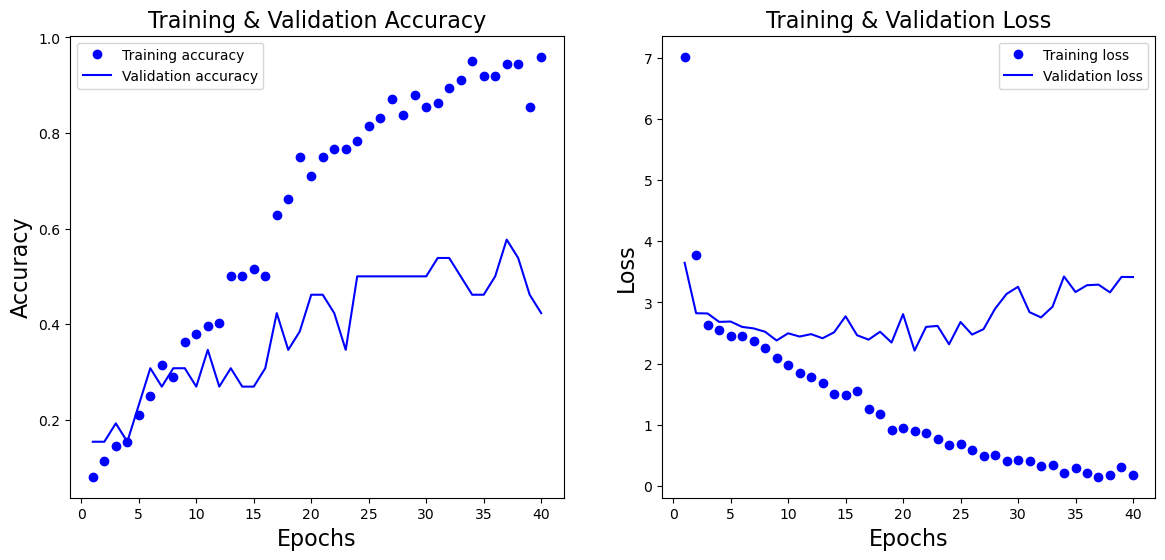

In [16]:
import matplotlib.pyplot as plt
  
history_dict = model.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
  
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss') 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

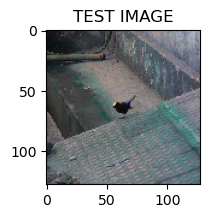

In [45]:
img=cv2.imread("D:/datasets/test_data/test_data/wcrsrt/100_4463.JPG")
if img is None:
    print("Failed to load the image")
img_array = tf.keras.preprocessing.image.img_to_array(img)

img_array = tf.expand_dims(img_array,0)
re=cv2.resize(img,(128,128)).reshape(-1,128,128,3)
plt.figure(figsize=(2,2))
plt.title("TEST IMAGE")
plt.imshow(re[0])

In [46]:
model1=tf.keras.models.load_model("image_classifier.h5")
model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

predictions = []
img=tf.keras.preprocessing.image.load_img("D:/datasets/test_data/test_data/wcrsrt/100_4463.JPG")
img= tf.keras.preprocessing.image.img_to_array(img)
img = tf.keras.preprocessing.image.smart_resize(img, (256,256))
img = tf.reshape(img, (-1, 256,256, 3))

labels=list(training_set.class_indices.keys())

prediction = model1.predict(img/255)

# print(prediction)
# print(labels)
predicted_class_indices=np.argmax(prediction,axis=1)
# print(predicted_class_indices)
predictions = [labels[k] for k in predicted_class_indices]
print(predictions[0])

1/1 [==============================] - 0s 104ms/step
blasti
